In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

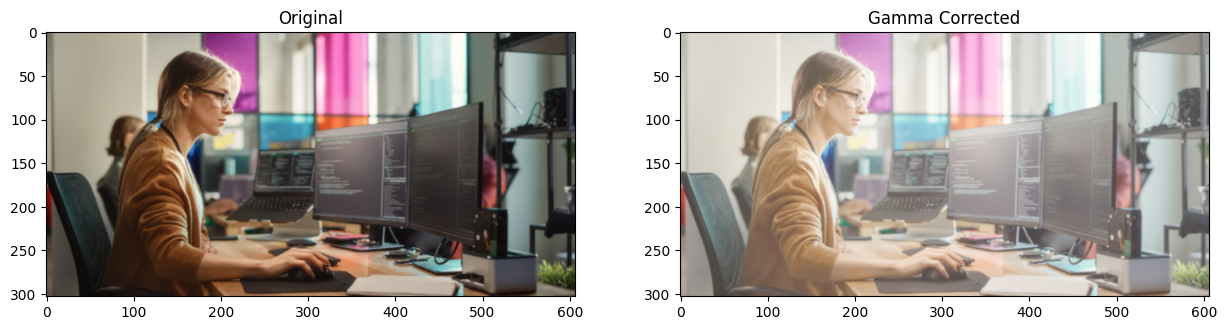

In [3]:
gamma = 0.4

img_original = cv2.imread("labphoto.png")

lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)


out = cv2.LUT(img_original, lookUpTable)


plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.imshow(img_original[..., ::-1])
plt.title("Original")
plt.subplot(122)
plt.imshow(out[..., ::-1])
plt.title("Gamma Corrected")
plt.show()


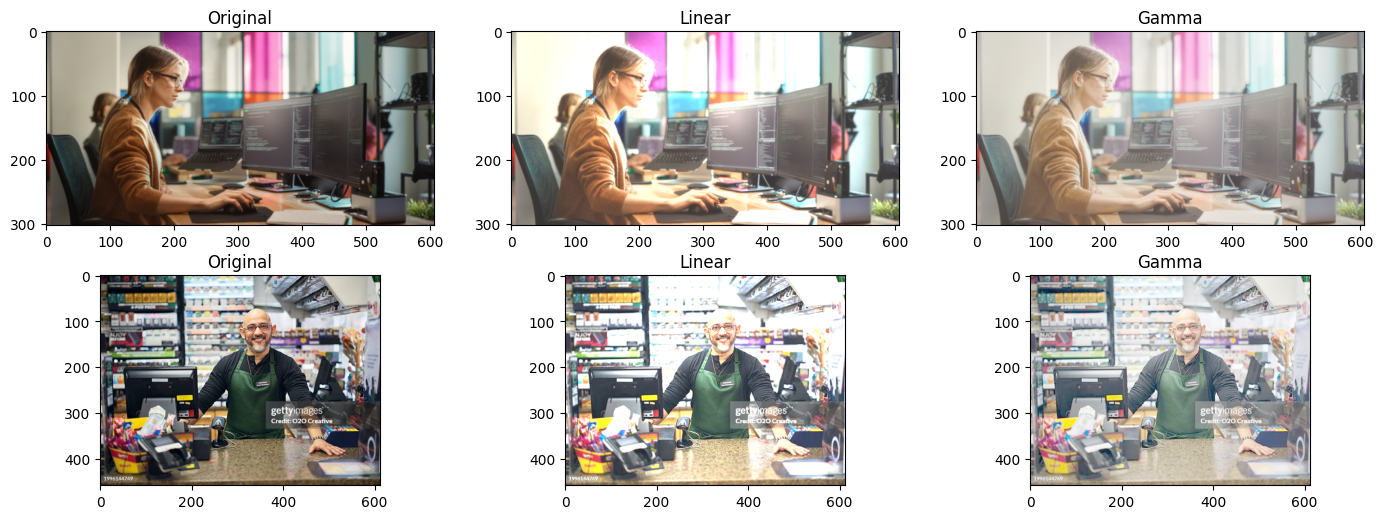

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


gamma = 0.4


img_original1 = cv2.imread("labphoto.png")
img_original2 = cv2.imread("labphotosecond.jpg")


if img_original1 is None:
    print("Error: Could not load labphoto.png")
    exit()
if img_original2 is None:
    print("Error: Could not load labphotosecond.jpg. Please ensure the file is uploaded.")

    img_original2_loaded = False
else:
    img_original2_loaded = True


output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
if img_original2_loaded:
    output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)


lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)


output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
if img_original2_loaded:
    output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)


plt.figure(figsize=[17,6])

plt.subplot(231)
plt.imshow(img_original1[..., ::-1])
plt.title("Original")
plt.subplot(232)
plt.imshow(output_linear1[..., ::-1])
plt.title("Linear")
plt.subplot(233)
plt.imshow(output_gammacorrected1[..., ::-1])
plt.title("Gamma")

if img_original2_loaded:
    plt.subplot(234)
    plt.imshow(img_original2[..., ::-1])
    plt.title("Original")
    plt.subplot(235)
    plt.imshow(output_linear2[..., ::-1])
    plt.title("Linear")
    plt.subplot(236)
    plt.imshow(output_gammacorrected2[..., ::-1])
    plt.title("Gamma")

plt.show()


In [3]:
def gamma_correction(image, c, gamma):

    I_norm = image.astype('float32') / 255.0

    output = c * (I_norm ** gamma)

    output = np.clip(output * 255, 0, 255).astype('uint8')

    return output

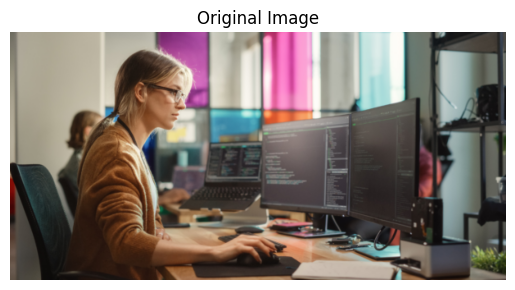

In [4]:
img = cv2.imread("labphoto.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

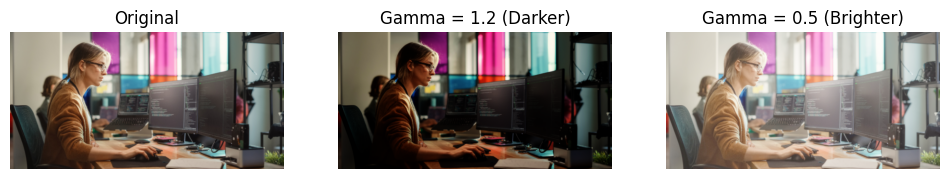

In [5]:
gamma_dark = gamma_correction(img, c=1, gamma=2.2)
gamma_bright = gamma_correction(img, c=1, gamma=0.5)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gamma_dark)
plt.title("Gamma = 1.2 (Darker)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(gamma_bright)
plt.title("Gamma = 0.5 (Brighter)")
plt.axis("off")

plt.show()


In [6]:
I_norm = img.astype('float32') / 255.0


cv2.imwrite("normalized.png", (I_norm*255).astype('uint8'))

True

In [7]:
def contrast_stretching(image, smin, smax):

    rmin = np.min(image)
    rmax = np.max(image)

    stretched = ((image - rmin) / (rmax - rmin)) * (smax - smin) + smin

    return np.clip(stretched, 0, 255).astype('uint8')

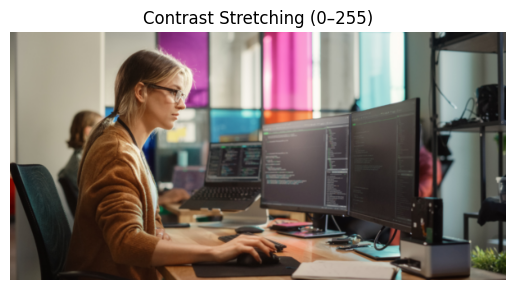

In [8]:
cs1 = contrast_stretching(img, 0, 255)

plt.imshow(cs1)
plt.title("Contrast Stretching (0–255)")
plt.axis("off")
plt.show()

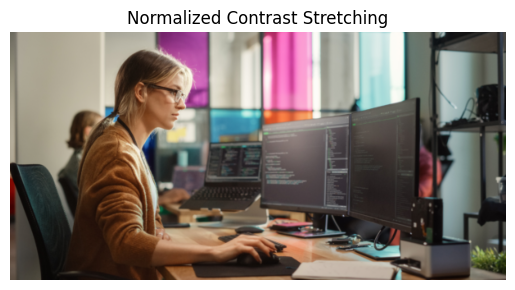

In [9]:
img_norm = img.astype('float32') / 255.0

cs2 = ((img_norm - img_norm.min()) /
      (img_norm.max() - img_norm.min())) * (1 - 0) + 0

plt.imshow(cs2)
plt.title("Normalized Contrast Stretching")
plt.axis("off")
plt.show()

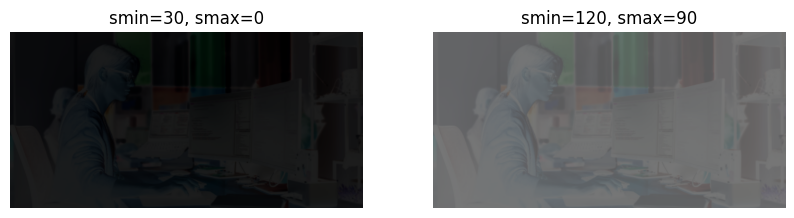

In [11]:
cs_a = contrast_stretching(img, 30, 0)
cs_b = contrast_stretching(img, 120, 90)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cs_a)
plt.title("smin=30, smax=0")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cs_b)
plt.title("smin=120, smax=90")
plt.axis("off")

plt.show()